# Get the Data 

In [5]:
import pandas as pd 
data = pd.read_csv("../data/data_3_range.csv", header=None, names=["secenek", "cinsiyet", "sidmalzememarka", "UrunGrubu", "ResimAdresi", "YakaTipi", 
                                                            "CepOzelligi", "KolBoyuAciklama", "resimSira"])
data.head() 

,secenek,cinsiyet,sidmalzememarka,UrunGrubu,ResimAdresi,YakaTipi,CepOzelligi,KolBoyuAciklama,resimSira
1,G021GL004.000.1011642.VR003,1,1,0GK,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL,3
2,G021GL004.000.1011642.VR003,1,1,0GK,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL,1
3,G021GL004.000.1011642.VR003,1,1,0GK,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL,2
4,G021GL004.000.1011907.VR036,1,1,0GU,https://resim.aydinli.com.tr/02/1/004/S5022152...,DÜĞMELI YAKA,CEPSIZ,UZUN KOL,1
5,G021GL004.000.1012040.VR003,1,1,0GU,https://resim.aydinli.com.tr/02/1/004/S5022136...,DÜĞMELI YAKA,CEPSIZ,UZUN KOL,1


In [6]:
data_img = data[["secenek","ResimAdresi", "YakaTipi", "CepOzelligi", "KolBoyuAciklama"]]
data_img.head() 

,secenek,ResimAdresi,YakaTipi,CepOzelligi,KolBoyuAciklama
1,G021GL004.000.1011642.VR003,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL
2,G021GL004.000.1011642.VR003,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL
3,G021GL004.000.1011642.VR003,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL
4,G021GL004.000.1011907.VR036,https://resim.aydinli.com.tr/02/1/004/S5022152...,DÜĞMELI YAKA,CEPSIZ,UZUN KOL
5,G021GL004.000.1012040.VR003,https://resim.aydinli.com.tr/02/1/004/S5022136...,DÜĞMELI YAKA,CEPSIZ,UZUN KOL


In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    data_img.iloc[:, :2],
    data_img.iloc[:, 2:],
    test_size=0.15, 
    random_state=42
)

X_train.shape, X_test.shape 

((3842, 2), (679, 2))

In [8]:
y_train["YakaTipi"].value_counts() 

DÜĞMELI YAKA     1814
BISIKLET YAKA     888
KAPIŞONLU         593
POLO YAKA         547
Name: YakaTipi, dtype: int64

In [9]:
y_train["CepOzelligi"].value_counts() 

CEPSIZ         2834
TEK CEP         360
ÇIFT CEP        328
KANGURU CEP     320
Name: CepOzelligi, dtype: int64

In [6]:
y_train["KolBoyuAciklama"].value_counts() 

UZUN KOL    2975
KISA KOL     867
Name: KolBoyuAciklama, dtype: int64

# Download Data 

In [141]:
import cv2 
import os 
import requests 
import numpy as np 

def save_image_cv(url, scale_percent, path, size = None):
    resp = requests.get(url, stream=True).raw 
    
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    if image is None: 
        raise TypeError("None type") 
    
    if size == None: 
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dsize = (width, height)
    else: 
        dsize = size 
    
    output = cv2.resize(image, dsize) 
    output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    return cv2.imwrite(path, output)


def make_dataset_cv(dataset_name, datasource, iteration = None, set_name="train"):
    problems_rows = []
    iterator = 0 
    try:
        base = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '.'))
        path = os.path.join('data', dataset_name)
        path = os.path.join(base, path)
        if not os.path.isdir(path):
            os.mkdir(path)
        
        # ../data/dataset_name/
        
        folder_set = os.path.join(path, set_name) 
        os.mkdir(folder_set) 
    
        for img_index, img_row in datasource.iterrows():
                try:
                    # tmp = os.path.join(path, img_row["partition"])
                    # data / dataset / train - test / 
                    #tmp = os.path.join(folder_set, "class_" + str(img_row["class"])) 
                    #if not os.path.isdir(tmp): 
                        #os.mkdir(tmp) 
                    
                    if save_image_cv(img_row['ResimAdresi'], 75, os.path.join(folder_set, str(img_index) + '.png'), size=(224, 224)) == False:
                        problems_rows.append(img_row)

                    if iteration is not None and iterator == iteration:
                        break
                    else:
                        iterator+=1
                        if iterator % 1000 == 0: 
                            print(f"Iteration {iterator}") 
                            
                except Exception as e2:
                    problems_rows.append(img_row)
                    print(e2)
                    continue
    except Exception as e:
        print('An exception occurred.', e)
    return problems_rows

In [ ]:
errors = make_dataset_cv(
    dataset_name = "range_3_images_den", 
    datasource = X_train
)

In [9]:
# errors

[]

In [10]:
""" errors_test = make_dataset_cv(
    dataset_name = "range_3_images", 
    datasource = X_test,
    set_name="test"
) """

An exception occurred. [WinError 183] Cannot create a file when that file already exists: 'c:\\Users\\melih.kacaman\\projects_analytics\\neckline-classifier\\neckline_classifier_Aydinli\\data\\range_3_images\\test'


In [11]:
# errors_test

[]

In [10]:
X_test[X_test.index == 945]

,secenek,ResimAdresi
945,G021GL004.000.989158.VR013,https://resim.aydinli.com.tr/So/t/are/est\02\1...


In [11]:
y_test[y_test.index ==945]

,YakaTipi,CepOzelligi,KolBoyuAciklama
945,DÜĞMELI YAKA,CEPSIZ,UZUN KOL


In [12]:
y_test.drop(index=945, inplace=True) 
X_test.drop(index=[945], inplace=True) 

In [13]:
X_train.drop(index=[898, 745], inplace=True) 
y_train.drop(index=[898, 745], inplace=True) 

In [14]:
X_train.shape, y_train.shape 

((3840, 2), (3840, 3))

In [15]:
X_test.shape, y_test.shape 

((678, 2), (678, 3))

In [17]:
import os 
X_train["paths"] = X_train.index.copy() 
X_train["paths"] = X_train["paths"].apply(lambda x: os.path.join("../data/range_3_images/train/",str(x) + '.png')) 

X_test["paths"] = X_test.index.copy() 
X_test["paths"] = X_test["paths"].apply(lambda x: os.path.join("../data/range_3_images/test/",str(x) + '.png')) 

In [18]:
X_test.head() 

,secenek,ResimAdresi,paths
2399,G081SZ004.000.744736.VR033,https://resim.aydinli.com.tr/08/1/004/S5019939...,../data/range_3_images/test/2399.png
801,G021GL004.000.880117.VR033,https://resim.aydinli.com.tr/02/1/004/S5021118...,../data/range_3_images/test/801.png
2289,G081GL082.000.851615.VR046,https://resim.aydinli.com.tr/08/1/082/S5020865...,../data/range_3_images/test/2289.png
2345,G081SZ004.000.1098327.VR006,https://resim.aydinli.com.tr/08/1/004/S5022635...,../data/range_3_images/test/2345.png
3616,G082SZ011.000.734024.VR054,https://resim.aydinli.com.tr/08/2/011/S5020268...,../data/range_3_images/test/3616.png


In [20]:
X_train.head() 

,secenek,ResimAdresi,paths
2576,G081SZ004.000.845178.VR006,https://resim.aydinli.com.tr/08/1/004/S5020787...,../data/range_3_images/train/2576.png
3094,G081SZ082.000.1498687.VR153,https://resim.aydinli.com.tr/08/1/082/S5025728...,../data/range_3_images/train/3094.png
863,G021GL004.000.881712.VR013,https://resim.aydinli.com.tr/02/1/004/S5021125...,../data/range_3_images/train/863.png
1181,G021SZ004.000.1276293.VR014,https://showroom.aydinli.com.tr/2021K/02/50238...,../data/range_3_images/train/1181.png
1607,G021SZ082.000.1385082.VR033,https://resim.aydinli.com.tr/02/1/082/S5024941...,../data/range_3_images/train/1607.png


In [19]:
train_data_flow_df = pd.concat([
    X_train.paths, 
    pd.Series(y_train.values.tolist(), index=y_train.index, name="labels")
], axis=1)

test_data_flow_df = pd.concat([
    X_test.paths, 
    pd.Series(y_test.values.tolist(), index=y_test.index, name="labels") 
], axis=1)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

In [21]:
train = train_gen.flow_from_dataframe(
    dataframe=train_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    seed=42, 
    class_mode='categorical', 
    target_size=(224, 224))

test = test_gen.flow_from_dataframe(
    dataframe=test_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    seed=42, 
    class_mode='categorical', 
    target_size=(224, 224))

Found 3840 validated image filenames belonging to 10 classes.
Found 678 validated image filenames belonging to 10 classes.


# Model 0: Efficient Net B0 

In [1]:
import tensorflow as tf 

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False 

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs) 
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid  

outputs = tf.keras.layers.Dense(10, kernel_initializer=initializer,activation=activation, name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs) 

In [2]:
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[
                    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')
                ]) 

In [36]:
checkpoint_path = "./checkpoints/range3/MODEL_0/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [3]:
model_0.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [38]:
history_model_0 = model_0.fit(
    train, 
    epochs=10, 
    steps_per_epoch=len(train), 
    validation_data = test,
    callbacks=[checkpoint_callback],
    validation_steps=len(test)
)

Epoch 1/10
120/120 [==============================] - ETA: 0s - loss: 0.3626 - accuracy: 0.8494 - precision: 0.7819 - recall: 0.6906
Epoch 1: saving model to ./checkpoints/range3/MODEL_0\checkpoint-1.ckpt
120/120 [==============================] - 121s 985ms/step - loss: 0.3626 - accuracy: 0.8494 - precision: 0.7819 - recall: 0.6906 - val_loss: 0.2713 - val_accuracy: 0.8926 - val_precision: 0.8640 - val_recall: 0.7620
Epoch 2/10
120/120 [==============================] - ETA: 0s - loss: 0.2557 - accuracy: 0.8977 - precision: 0.8643 - recall: 0.7817
Epoch 2: saving model to ./checkpoints/range3/MODEL_0\checkpoint-2.ckpt
120/120 [==============================] - 132s 1s/step - loss: 0.2557 - accuracy: 0.8977 - precision: 0.8643 - recall: 0.7817 - val_loss: 0.2295 - val_accuracy: 0.9087 - val_precision: 0.8773 - val_recall: 0.8088
Epoch 3/10
120/120 [==============================] - ETA: 0s - loss: 0.2229 - accuracy: 0.9132 - precision: 0.8838 - recall: 0.8181
Epoch 3: saving model to .

<AxesSubplot:>

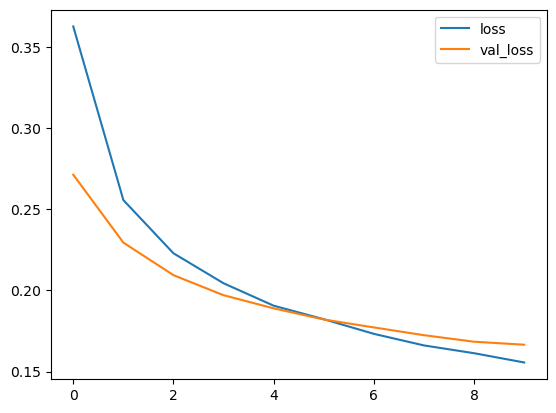

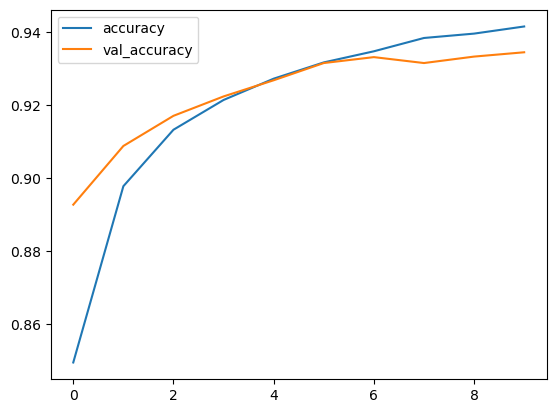

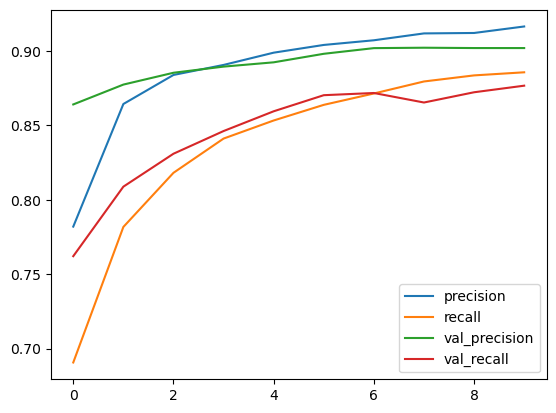

In [47]:
pd.DataFrame(history_model_0.history)[["loss", "val_loss"]].plot()

pd.DataFrame(history_model_0.history)[["accuracy", "val_accuracy"]].plot()

pd.DataFrame(history_model_0.history)[["precision", "recall", "val_precision", "val_recall"]].plot()

## Fine Tuning 

In [48]:
for layer in model_0.layers: 
  print(layer.trainable)

True
False
True
True


In [49]:
len(base_model.trainable_variables)

0

In [51]:
base_model.trainable = True 

for layer in base_model.layers[:-10]:
  layer.trainable = False 

model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[
                    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')
                ]) 


In [53]:
# Fine tune for another 5 epochs
fine_tune_epochs = 10 + 5

# Refit the model (same as model_2 except with more trainable layers)
history_model_0_fine = model_0.fit(train,
                                  epochs=fine_tune_epochs,
                                  validation_data=test,
                                  initial_epoch=history_model_0.epoch[-1], # start from previous last epoch
                                  validation_steps=len(test),
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 10/15
120/120 [==============================] - ETA: 0s - loss: 0.1627 - accuracy: 0.9366 - precision: 0.9021 - recall: 0.8846
Epoch 10: saving model to ./checkpoints/range3/MODEL_0\checkpoint-10.ckpt
120/120 [==============================] - 118s 954ms/step - loss: 0.1627 - accuracy: 0.9366 - precision: 0.9021 - recall: 0.8846 - val_loss: 0.1487 - val_accuracy: 0.9416 - val_precision: 0.9141 - val_recall: 0.8889
Epoch 11/15
120/120 [==============================] - ETA: 0s - loss: 0.1050 - accuracy: 0.9601 - precision: 0.9387 - recall: 0.9275
Epoch 11: saving model to ./checkpoints/range3/MODEL_0\checkpoint-11.ckpt
120/120 [==============================] - 114s 955ms/step - loss: 0.1050 - accuracy: 0.9601 - precision: 0.9387 - recall: 0.9275 - val_loss: 0.1275 - val_accuracy: 0.9513 - val_precision: 0.9424 - val_recall: 0.8923
Epoch 12/15
120/120 [==============================] - ETA: 0s - loss: 0.0774 - accuracy: 0.9710 - precision: 0.9557 - recall: 0.9474
Epoch 12: saving

In [54]:
import matplotlib.pyplot as plt 

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

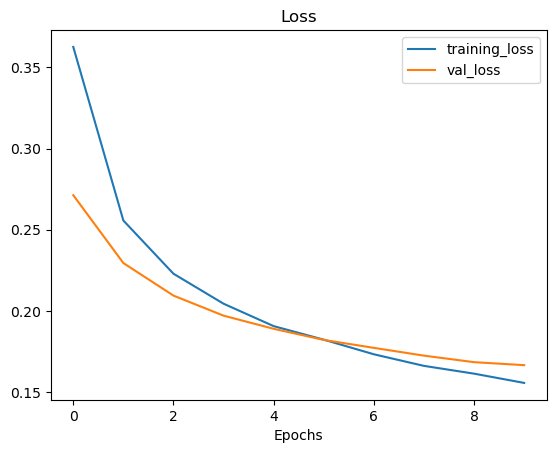

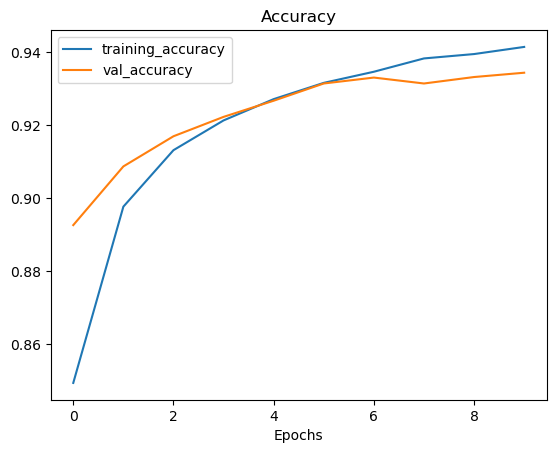

In [55]:
plot_loss_curves(history_model_0)

In [56]:
def compare_historys(original_history, new_history, initial_epochs=10):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """ 
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

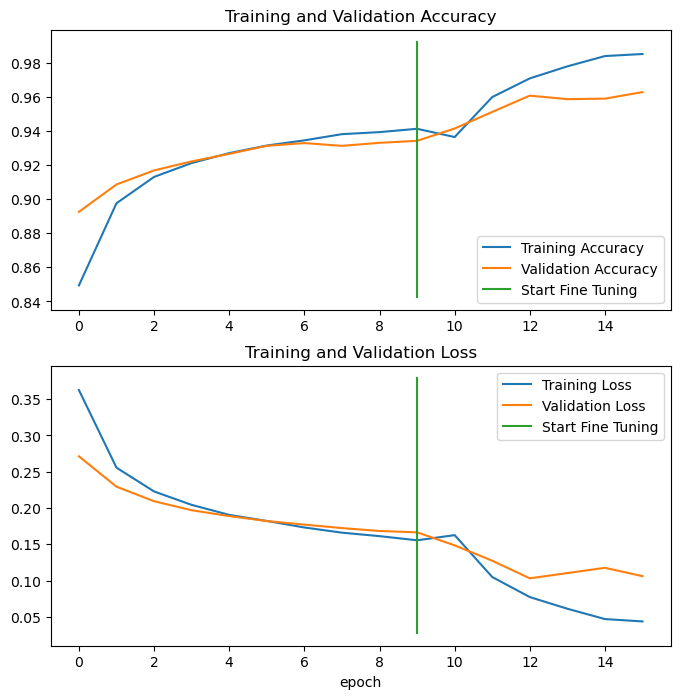

In [57]:
compare_historys(history_model_0, history_model_0_fine, initial_epochs=10)

<AxesSubplot:>

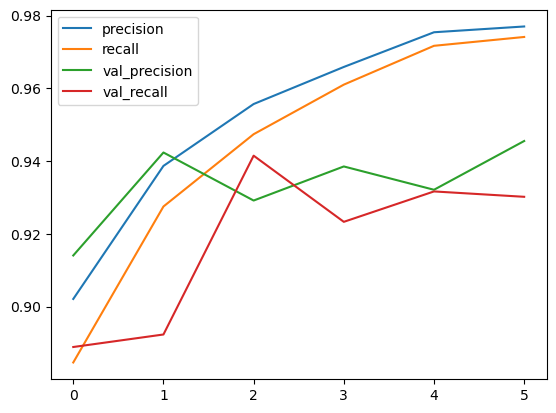

In [60]:
pd.DataFrame(history_model_0_fine.history)[["precision", "recall", "val_precision", "val_recall"]].plot()

In [62]:
pd.DataFrame(history_model_0_fine.history)[["precision", "recall", "val_precision", "val_recall"]]

,precision,recall,val_precision,val_recall
0,0.902098,0.884635,0.914055,0.888889
1,0.938680,0.927517,0.942368,0.892330
2,0.955692,0.947396,0.929161,0.941495
3,0.965887,0.961024,0.938531,0.923304
4,0.975427,0.971701,0.932120,0.931662
5,0.977015,0.974132,0.945527,0.930187


In [63]:
pd.DataFrame(history_model_0.history)[["precision", "recall", "val_precision", "val_recall"]]

,precision,recall,val_precision,val_recall
0,0.781916,0.690625,0.863991,0.762045
1,0.864286,0.781684,0.877333,0.808751
2,0.883804,0.818056,0.885280,0.830875
3,0.890533,0.841059,0.889406,0.846116
4,0.898775,0.853212,0.892292,0.859390
5,0.903970,0.863715,0.898021,0.870206
6,0.907103,0.871354,0.901831,0.871681
7,0.911717,0.879427,0.902101,0.865290
8,0.912007,0.883507,0.901881,0.872173
9,0.916375,0.885590,0.901872,0.876598


In [22]:
model_0.load_weights("./checkpoints/range3/MODEL_0/checkpoint-12.ckpt") # important: ckpt 12 load 

In [23]:
model_0.evaluate(
    test
)
# 14s 642ms/step - loss: 0.1032 - accuracy: 0.9609 - precision: 0.9292 - recall: 0.9415

22/22 [==============================] - 15s 640ms/step - loss: 0.1032 - accuracy: 0.9609 - precision: 0.9292 - recall: 0.9415


[0.10323052108287811,
 0.9609144330024719,
 0.9291605949401855,
 0.9414945840835571]

In [ ]:
# model_0.save('../trained_models/efficient_net_model_range3.h5')
# model couldn't save ! 

## Prediction 

In [36]:
input_first = test[0][0][0] 
output_first = test[0][1][0]

In [40]:
import cv2 
input_first = cv2.resize(input_first,(224,224))     # resize image to match model's expected sizing
input_first = input_first.reshape(1,224,224,3)

In [42]:
results = model_0.predict(
    input_first
)

1/1 [==============================] - 0s 42ms/step


In [44]:
results[results >= 0.5] = 1 
results[results < 0.5] = 0 

In [45]:
results

array([[0., 1., 1., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [46]:
output_first

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

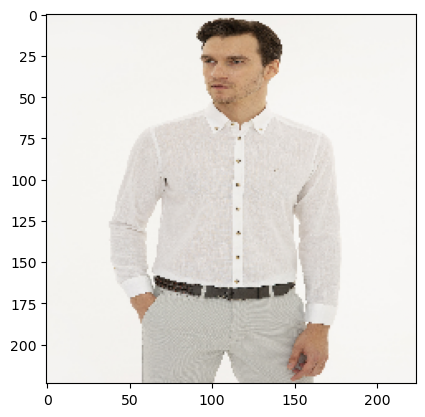

In [59]:
from matplotlib import pyplot as plt 

plt.imshow(test[0][0][0] / 255.0)

In [71]:
classes = test.class_indices 
classes

{'BISIKLET YAKA': 0,
 'CEPSIZ': 1,
 'DÜĞMELI YAKA': 2,
 'KANGURU CEP': 3,
 'KAPIŞONLU': 4,
 'KISA KOL': 5,
 'POLO YAKA': 6,
 'TEK CEP': 7,
 'UZUN KOL': 8,
 'ÇIFT CEP': 9}

In [116]:
import cv2
from matplotlib import pyplot as plt 


def predict_custom(img_input_array, img_labels, model=model_0, threshold=0.5, classes=classes):
    input_x = cv2.resize(img_input_array,(224,224))     # resize image to match model's expected sizing
    input_x = input_x.reshape(1,224,224,3) 

    results = model_0.predict(input_x) 
    results[results >= threshold] = 1 
    results[results < threshold] = 0

    results = pd.DataFrame(
        index=classes.keys(), 
        data=np.column_stack((results.reshape((10,1)), img_labels.reshape((10,1)))),
        columns=["preds", "actuals"] 
    )

    plt.imshow(img_input_array / 255.0)
    plt.show()

    return results   

1/1 [==============================] - 0s 56ms/step


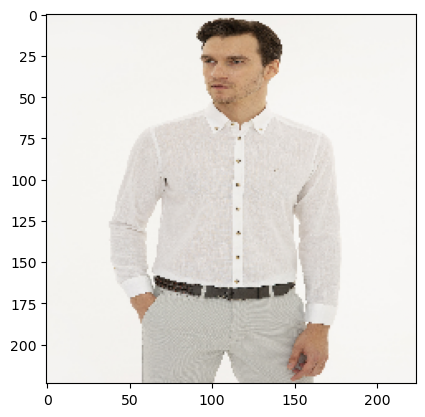

,preds,actuals
BISIKLET YAKA,0.0,0.0
CEPSIZ,1.0,1.0
DÜĞMELI YAKA,1.0,1.0
KANGURU CEP,0.0,0.0
KAPIŞONLU,0.0,0.0
KISA KOL,0.0,0.0
POLO YAKA,0.0,0.0
TEK CEP,0.0,0.0
UZUN KOL,1.0,1.0
ÇIFT CEP,0.0,0.0


In [117]:
predict_custom(
    test[0][0][0], 
    test[0][1][0]
)

1/1 [==============================] - 0s 55ms/step


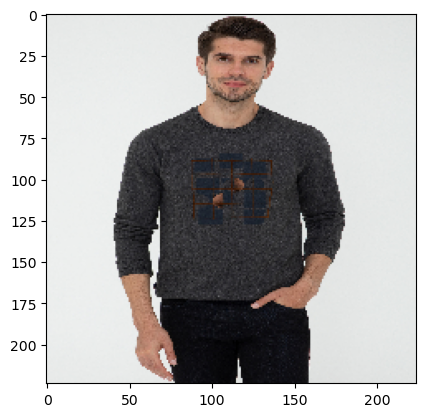

,preds,actuals
BISIKLET YAKA,1.0,1.0
CEPSIZ,1.0,1.0
DÜĞMELI YAKA,0.0,0.0
KANGURU CEP,0.0,0.0
KAPIŞONLU,0.0,0.0
KISA KOL,0.0,0.0
POLO YAKA,0.0,0.0
TEK CEP,0.0,0.0
UZUN KOL,1.0,1.0
ÇIFT CEP,0.0,0.0


In [119]:
predict_custom(
    test[0][0][20], 
    test[0][1][20]
)

1/1 [==============================] - 0s 269ms/step


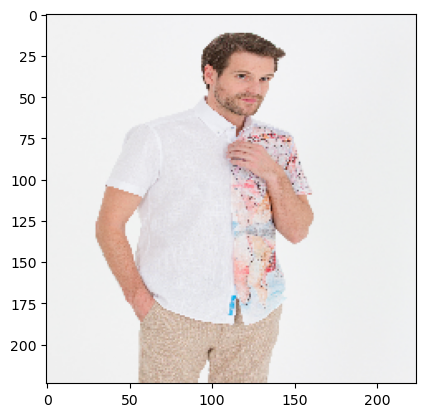

,preds,actuals
BISIKLET YAKA,0.0,0.0
CEPSIZ,1.0,1.0
DÜĞMELI YAKA,1.0,1.0
KANGURU CEP,0.0,0.0
KAPIŞONLU,0.0,0.0
KISA KOL,1.0,1.0
POLO YAKA,0.0,0.0
TEK CEP,0.0,0.0
UZUN KOL,0.0,0.0
ÇIFT CEP,0.0,0.0


In [138]:
predict_custom(
    test[10][0][30], 
    test[10][1][30]
)

# Model 1: VGG-16 

In [122]:
vgg_16 = tf.keras.applications.VGG16(weights="imagenet",input_shape=(224, 224, 3), include_top=False) 
vgg_16.trainable = False 

In [123]:
inputs = tf.keras.layers.Input(shape=(224,224,3)) 
x = tf.cast(inputs, tf.float32)
x = tf.keras.layers.Lambda(lambda c: tf.image.rgb_to_grayscale(c))(x)
x = tf.keras.applications.vgg16.preprocess_input(x)
x = vgg_16(x) 
x = tf.keras.layers.GlobalAveragePooling2D()(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid 

outputs = tf.keras.layers.Dense(10,
                             kernel_initializer=initializer, 
                             activation=activation)(x) 

model_1 = tf.keras.Model(inputs, outputs) 

In [124]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(), # default from_logits=False
              metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')])

In [125]:
checkpoint_path = "./checkpoints/range3/MODEL_1/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [ ]:
history_model_1 = model_1.fit(train, 
                            epochs=10,
                            steps_per_epoch=len(train), 
                            validation_data =test,
                            validation_steps=len(test),
                            callbacks=[checkpoint_callback]
                            )

# Model 2: MobileNetV2 

In [127]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1), 
    tf.keras.layers.RandomBrightness(0.1)
])

In [133]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
mobile_net.trainable = False

In [134]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = mobile_net(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10,
                             activation=tf.keras.activations.sigmoid)(x)
model_2 = tf.keras.Model(inputs, outputs)

In [135]:
base_learning_rate = 0.0001
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')])

In [136]:
checkpoint_path = "./checkpoints/range3/MODEL_2/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [ ]:
history_model_2 = model_2.fit(train, 
                            epochs=10,
                            steps_per_epoch=len(train), 
                            validation_data =test,
                            validation_steps=len(test),
                            callbacks=[checkpoint_callback]
                            )